# Loan Prediction Based on Customer Behavior
Predict who possible Defaulters are for the Consumer Loans Product

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data : https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior

In [3]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# 결측치 확인
df.isnull().sum() 
# 결측치 x

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
# Id는 필요없으니 제거합니다
df.drop(columns = ['Id'])

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


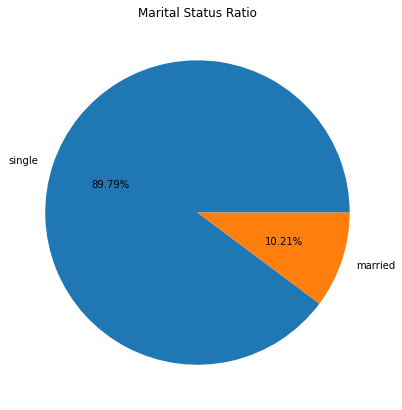

In [6]:
plt.figure(figsize=(7,7))
df['Married/Single'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Marital Status Ratio")
plt.ylabel("")
plt.show()

Text(0.5, 0, 'Count')

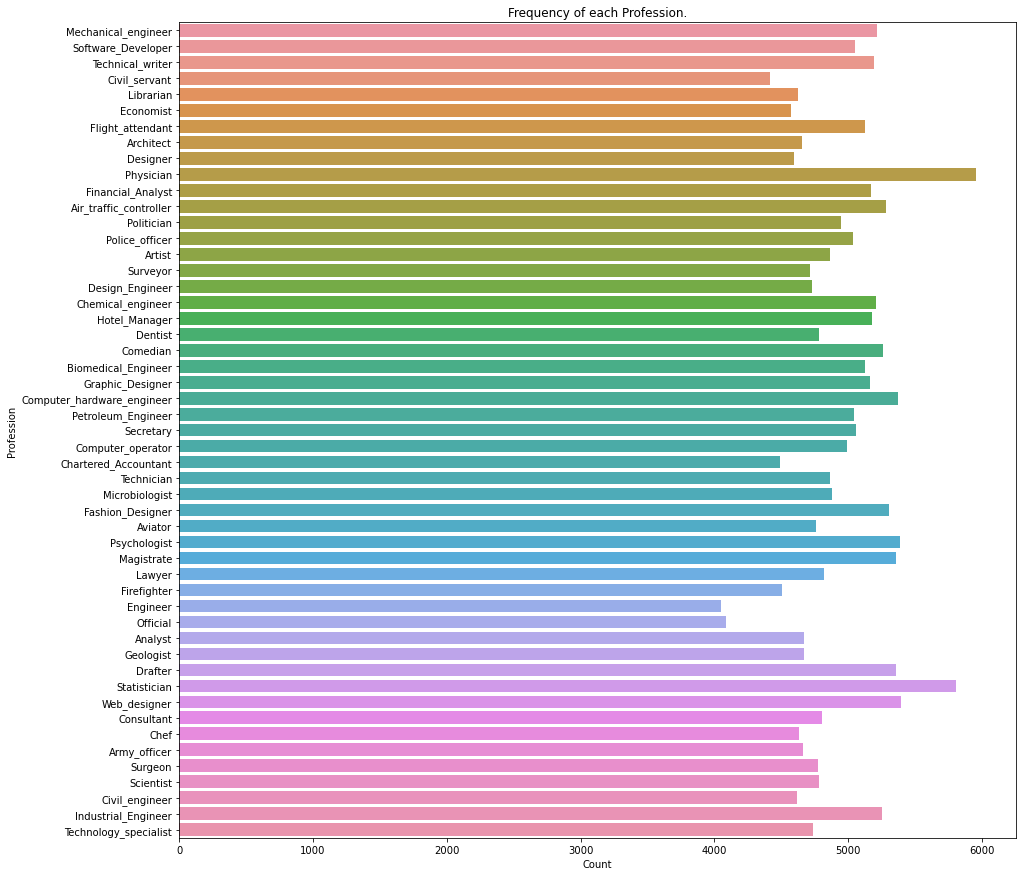

In [7]:
plt.figure(figsize=(15,15))
sns.countplot(y=df['Profession'])
plt.title("Frequency of each Profession.")
plt.ylabel("Profession")
plt.xlabel("Count")

Text(0.5, 0, 'Count')

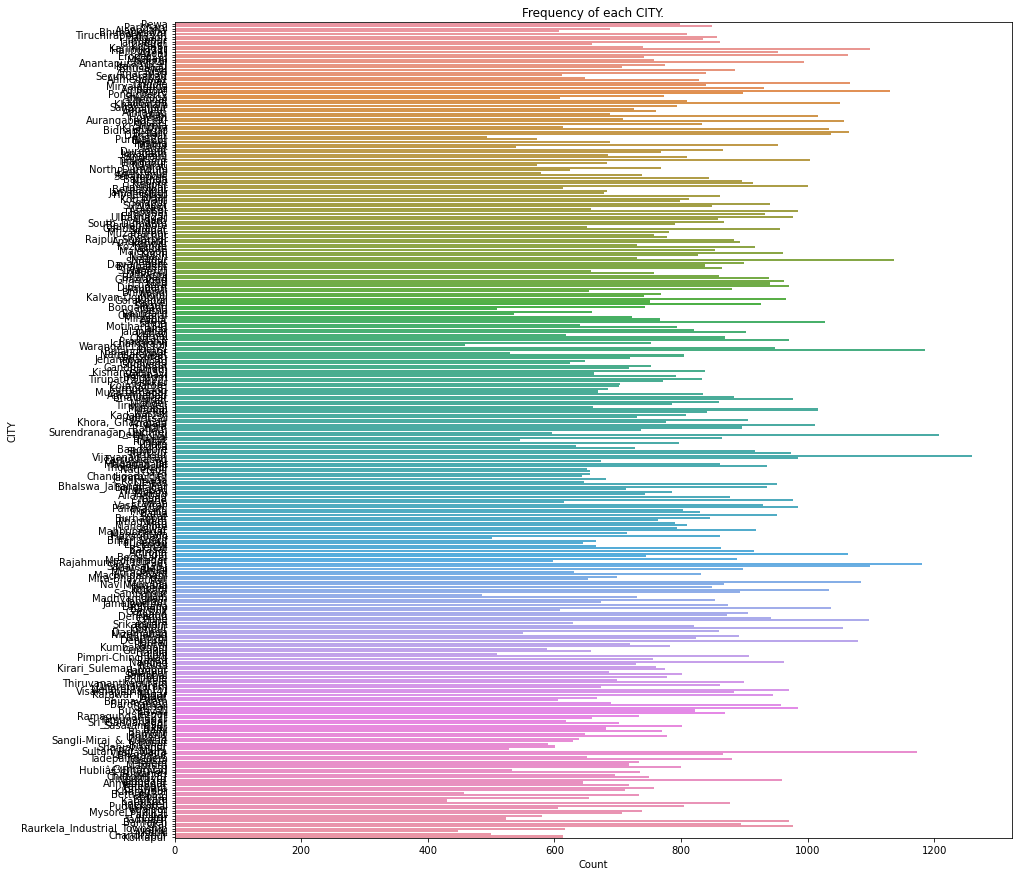

In [8]:
plt.figure(figsize=(15,15))
sns.countplot(y=df['CITY'])
plt.title("Frequency of each CITY.")
plt.ylabel("CITY")
plt.xlabel("Count")
# 너무 많음

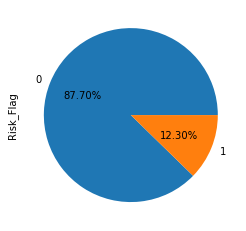

In [9]:
df['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

In [10]:
df['House_Ownership'].value_counts()
df['Married/Single'].value_counts()
df['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [11]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 합니다.
df = df.replace(['single','married'],[0,1])
df = df.replace(['no','yes'],[0,1])


In [12]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [61]:
# object 자료형 데이터의 변수를 정리합니다.
cat_features = ['House_Ownership','Profession', 'CITY', 'STATE']
# 수치 자료형 데이터의 변수를 정리합니다.
num_features=['Income', 'Age', 'Experience', 'Married/Single','Car_Ownership','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

# 더미를 기법을 사용하여 변환합니다.
for variable in cat_features:
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성합니다.
    dummies = pd.get_dummies(df[cat_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가합니다.
    df1= pd.concat([df[num_features], dummies],axis=1)

In [14]:
df1

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,0,0,3,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,0,0,9,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,1,0,4,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,0,1,2,12,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,0,0,3,14,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,6,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,0,0,6,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,0,0,7,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# 예측해야 할 변수인 `Risk`를 제거하여 머신러닝 입력값인 x에 저장합니다.
x = df1.drop(columns = ['Risk_Flag']).to_numpy()

In [16]:
# 예측해야 할 변수 `Risk`만을 선택하여 numpy 형태로 y에 저장합니다.
y = df['Risk_Flag']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용

In [17]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 학습, 테스트 데이터 분리

머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용합니다.

In [18]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 분리 할 수 있습니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
x_train

array([[1759916,      33,       0, ...,       0,       0,       0],
       [1325345,      66,       8, ...,       0,       0,       0],
       [3971141,      67,      16, ...,       0,       0,       0],
       ...,
       [2557871,      55,      14, ...,       0,       0,       0],
       [8914067,      77,      18, ...,       0,       0,       0],
       [6001312,      70,       4, ...,       0,       0,       0]],
      dtype=int64)

## 머신러닝 모델 학습

전 처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력 해봅니다.

먼저 기본적인 분류 모델인 **의사결정나무**를 사용하여 학습을 수행합니다

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9363789682539683
0.8853769841269842


In [21]:
y_pred = model.predict(x_test)

## 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $



### Confusion Matrix

Accuracy:  0.89 

Recall:  0.55 

Precision:  0.53 

F1_score:  0.54 

Confusion Matrix: 
 [[41242  3017]
 [ 2760  3381]]


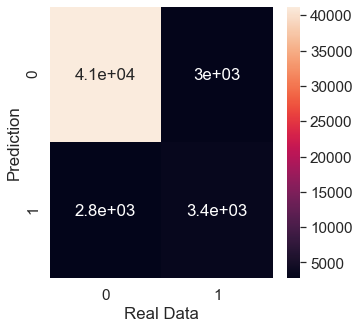

In [25]:
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()


## 시각화

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [56]:
for i in df1.Risk_Flag.values:
    if i  == 0:
        df1.Risk_Flag.replace(i, 'O', inplace = True)
    else:
        df1.Risk_Flag.replace(i, 'X', inplace = True)

In [ ]:
df1['Risk_Flag'].value_counts()

In [1]:
from sklearn.tree import plot_tree # tree diagram
a = df1.drop(columns = ['Risk_Flag'])
feature_names = a.columns[:,]
target_names = df1['Risk_Flag'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)




NameError: name 'df1' is not defined